## Importing the Packages

In [7]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [6]:
!pip install yfinance

     --------------------------------------- 59.7/59.7 kB 51.0 kB/s eta 0:00:00
     ------------------------------------- 112.2/112.2 kB 26.6 kB/s eta 0:00:00


## Importing the Data

In [8]:
raw_data = yfinance.download (tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker',
                              auto_adjust = True)

[*********************100%***********************]  3 of 3 completed


In [9]:
raw_data

PAH3.DE                                                  BMW.DE  \
                 Open       High        Low      Close     Volume        Open   
Date                                                                            
1996-11-08        NaN        NaN        NaN        NaN        NaN    9.353779   
1996-11-11        NaN        NaN        NaN        NaN        NaN    9.343505   
1996-11-12        NaN        NaN        NaN        NaN        NaN    9.328610   
1996-11-13        NaN        NaN        NaN        NaN        NaN    9.422609   
1996-11-14        NaN        NaN        NaN        NaN        NaN    9.351213   
...               ...        ...        ...        ...        ...         ...   
2023-03-24  51.799999  51.900002  50.439999  50.820000  1125576.0   98.629997   
2023-03-27  51.380001  52.779999  51.320000  52.080002   887116.0   98.879997   
2023-03-28  52.939999  53.119999  51.459999  51.520000   632176.0   99.489998   
2023-03-29  51.720001  52.380001  51.080002  52.380001   732215.0   98.699997   
2023-03-31  53.360001  53.360001  52.639999  52.799999   111909.0  101.000000   

                                                            VOW3.DE  \
                  High         Low       Close   Volume        Open   
Date                                                                  
1996-11-08    9.353779    9.333747    9.333747   767000         NaN   
1996-11-11    9.348642    9.288030    9.308576   260000         NaN   
1996-11-12    9.414391    9.293167    9.378949  1066000         NaN   
1996-11-13    9.422609    9.343506    9.364052   793000         NaN   
1996-11-14    9.394361    9.313716    9.394361   351000         NaN   
...                ...         ...         ...      ...         ...   
2023-03-24   98.629997   96.279999   97.760002  1434754  120.120003   
2023-03-27   99.470001   97.820000   98.650002   859592  120.480003   
2023-03-28   99.839996   98.580002   98.790001   679684  122.599998   
2023-03-29   99.129997   97.629997   98.930000   960170  122.500000   
2023-03-31  101.139999  100.300003  100.599998    69521  125.599998   

                                                           
                  High         Low       Close     Volume  
Date                                                       
1996-11-08         NaN         NaN         NaN        NaN  
1996-11-11         NaN         NaN         NaN        NaN  
1996-11-12         NaN         NaN         NaN        NaN  
1996-11-13         NaN         NaN         NaN        NaN  
1996-11-14         NaN         NaN         NaN        NaN  
...                ...         ...         ...        ...  
2023-03-24  120.500000  116.120003  119.000000  2189438.0  
2023-03-27  121.940002  119.699997  120.860001   939130.0  
2023-03-28  122.879997  120.879997  121.879997   653728.0  
2023-03-29  122.680000  121.199997  122.599998   709072.0  
2023-03-31  125.779999  124.540001  125.080002   113316.0  

[6767 rows x 15 columns]

In [10]:
df = raw_data.copy()

## Defining Key Dates

In [11]:
# Starting Date
start_date = "2009-04-05" 

# First Official Announcement - 49.9%
ann_1 = "2009-12-09" 

# Second Official Announcement - 51.1%
ann_2 = "2012-07-05" 

#Ending Date
end_date = "2022-01-01"

# Dieselgate
d_gate = '2015-09-20' 

## Pre-processing the Data

In [12]:
# Extracting Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating Squared Returns
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [13]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [14]:
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Plotting the Prices

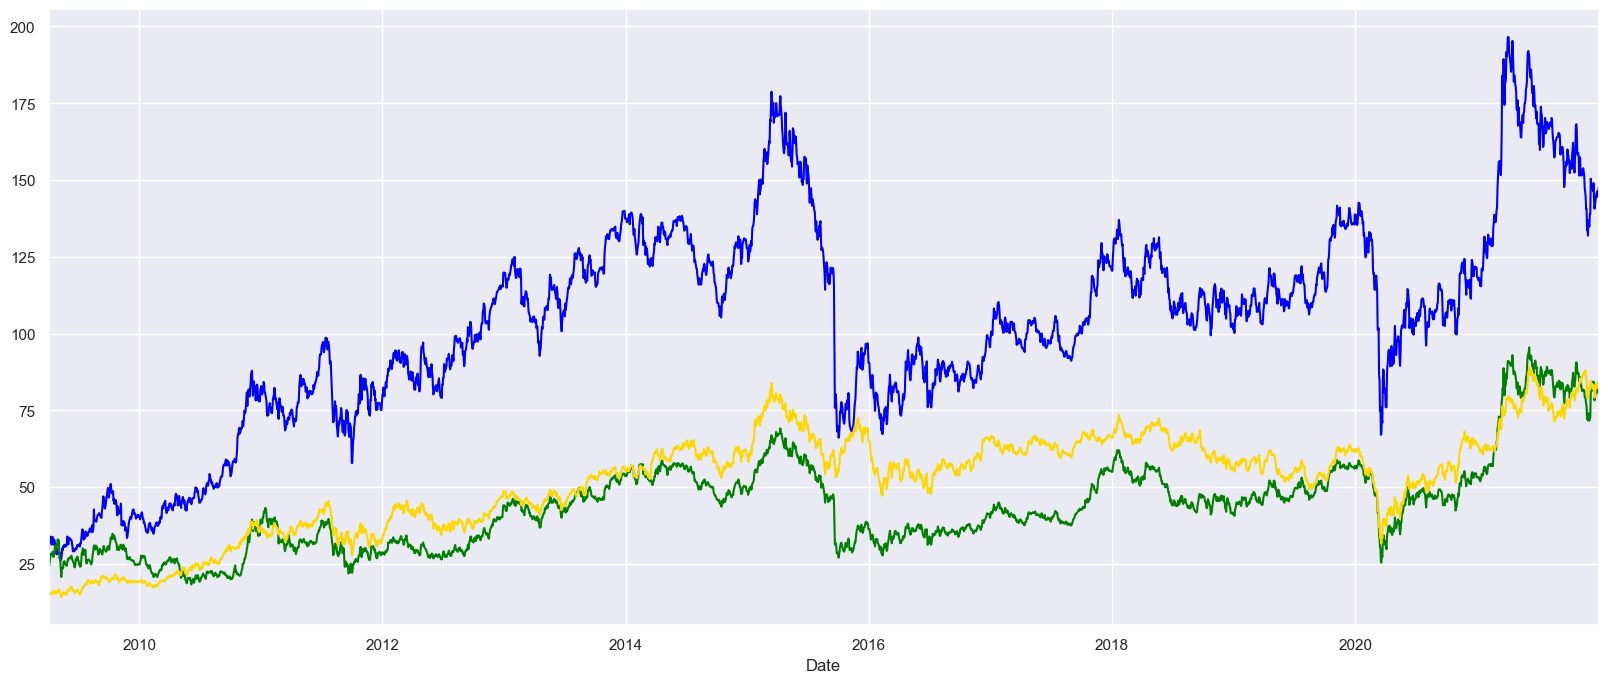

In [15]:
df['vol'][start_date:end_date].plot(figsize= (20,8), color = "blue")
df['por'][start_date:end_date].plot(color = "green")
df['bmw'][start_date:end_date].plot(color = "gold")
plt.show()

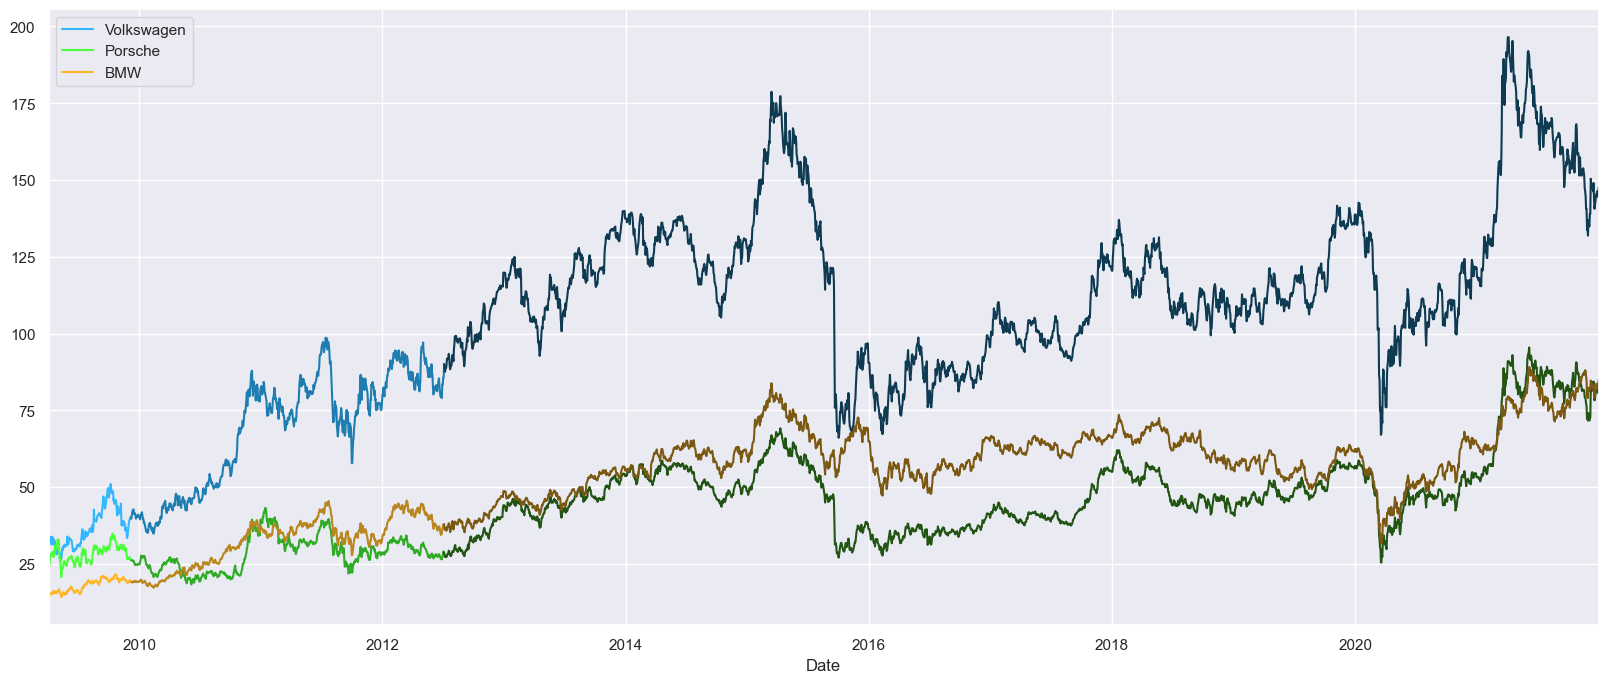

In [16]:
df['vol'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

df['vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

df['vol'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()

## Correlation

In [17]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2022-01-01

Volkswagen and Porsche correlation: 	0.9154931359470216
Volkswagen and BMW correlation: 	0.8655685317262753
Porsche and BMW correlation: 		0.8183590627321495


In [18]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(ann_1)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6633584413758843
Volkswagen and BMW correlation: 	0.8427606937235326
Porsche and BMW correlation: 		0.6095038803247984


In [19]:
print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str(ann_2)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7428267901355923
Volkswagen and BMW correlation: 	0.97959430273395
Porsche and BMW correlation: 		0.7042723129385888


In [21]:
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2022-01-01

Volkswagen and Porsche correlation: 	0.9301999971689509
Volkswagen and BMW correlation: 	0.6292092863393177
Porsche and BMW correlation: 		0.7412853530657139


In [22]:
print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(df.index[-1])+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][end_date:].corr(df['bmw'][end_date:])))

Correlation among manufacturers from 2022-01-01 to 2023-03-31 00:00:00

Volkswagen and Porsche correlation: 	0.5847336194398712
Volkswagen and BMW correlation: 	0.44925998341774226
Porsche and BMW correlation: 		-0.3915535864726225


## Best Fitting Models

### For Volkswagen

In [23]:
mod_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2], exogenous = df[['por','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_vol = auto_arima(df.vol[ann_2:end_date], exogenous = df[['por','bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)

In [24]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -298.649
Date:                Fri, 31 Mar 2023   AIC                            599.299
Time:                        14:40:15   BIC                            602.475
Sample:                    04-06-2009   HQIC                           600.587
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.7103      0.095     17.983      0.000       1.524       1.897
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               232.52
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1317.283
Date:                Fri, 31 Mar 2023   AIC                           2638.566
Time:                        14:40:15   BIC                           2647.583
Sample:                    12-09-2009   HQIC                          2642.058
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0899      0.034      2.645      0.008       0.023       0.156
sigma2         2.9696      0.119     24.998      0.000       2.737       3.202
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                85.28
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.54   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2477
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5599.834
Date:                Fri, 31 Mar 2023   AIC                          11205.668
Time:                        14:40:15   BIC                          11223.111
Sample:                    07-05-2012   HQIC                         11212.004
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5415      0.091     -5.921      0.000      -0.721      -0.362
ma.L1          0.6210      0.089      7.014      0.000       0.447       0.794
sigma2         5.3947      0.071     75.500      0.000       5.255       5.535
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              7404.38
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### For Porsche

In [27]:
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous = df[['vol','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2], exogenous = df[['vol','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_por = auto_arima(df.por[ann_2:end_date], exogenous = df[['vol','bmw']][ann_2:end_date],
                             m = 5, max_p = 5, max_q = 5)

In [28]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -251.149
Date:                Fri, 31 Mar 2023   AIC                            504.298
Time:                        14:40:32   BIC                            507.474
Sample:                    04-06-2009   HQIC                           505.586
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.0000      0.053     19.004      0.000       0.897       1.103
===================================================================================
Ljung-Box (L1) (Q):                   3.50   Jarque-Bera (JB):               319.80
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -806.676
Date:                Fri, 31 Mar 2023   AIC                           1617.352
Time:                        14:40:32   BIC                           1626.370
Sample:                    12-09-2009   HQIC                          1620.845
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1096      0.032      3.457      0.001       0.047       0.172
sigma2         0.6482      0.020     32.054      0.000       0.609       0.688
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               483.16
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2477
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -3481.627
Date:                Fri, 31 Mar 2023   AIC                           6969.254
Time:                        14:40:32   BIC                           6986.697
Sample:                    07-05-2012   HQIC                          6975.590
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0639      0.011      5.824      0.000       0.042       0.085
ar.L2          0.0290      0.015      1.946      0.052      -0.000       0.058
sigma2         0.9747      0.012     78.964      0.000       0.951       0.999
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8600.51
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.79   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions for the Future

### For Porsche

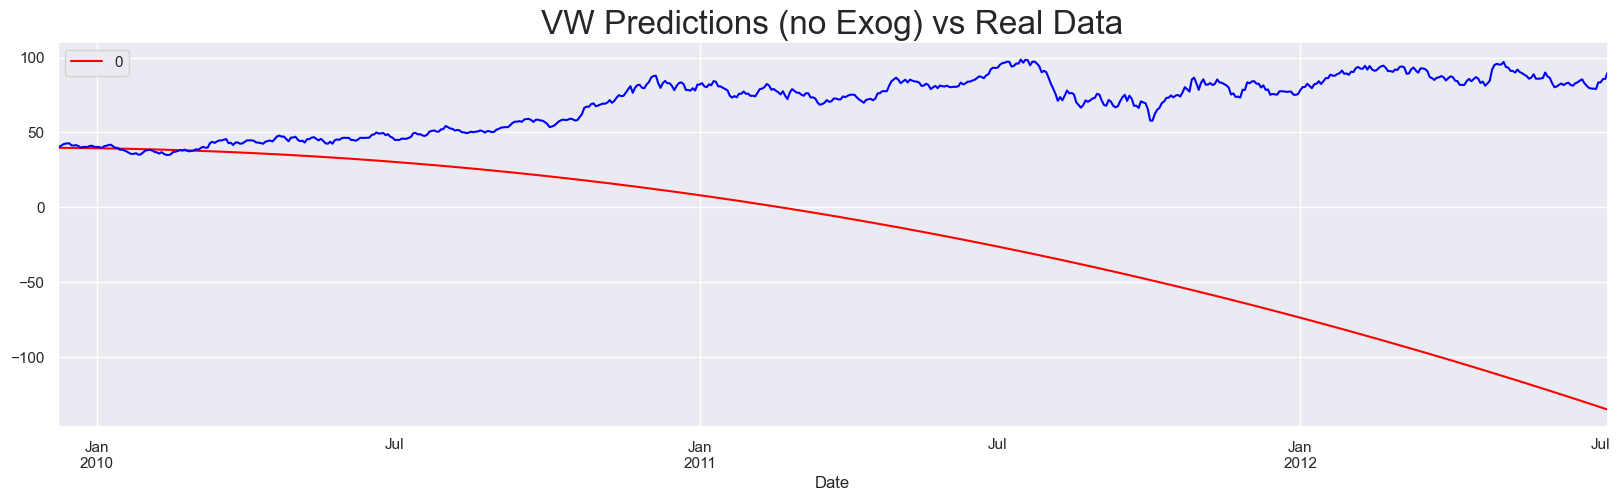

In [31]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data", size = 24)
plt.show()

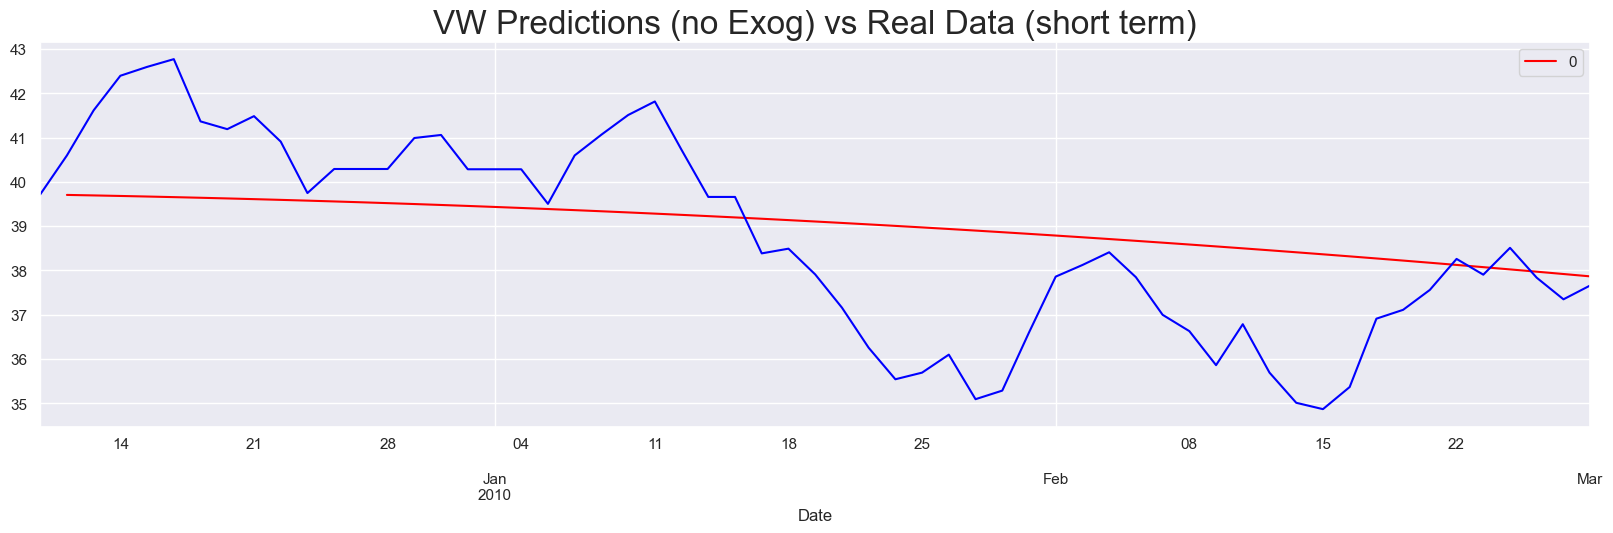

In [32]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize = (20,5), color = "red")
df.vol[ann_1:'2010-03-01'].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size = 24)
plt.show()

### For Volkswagen

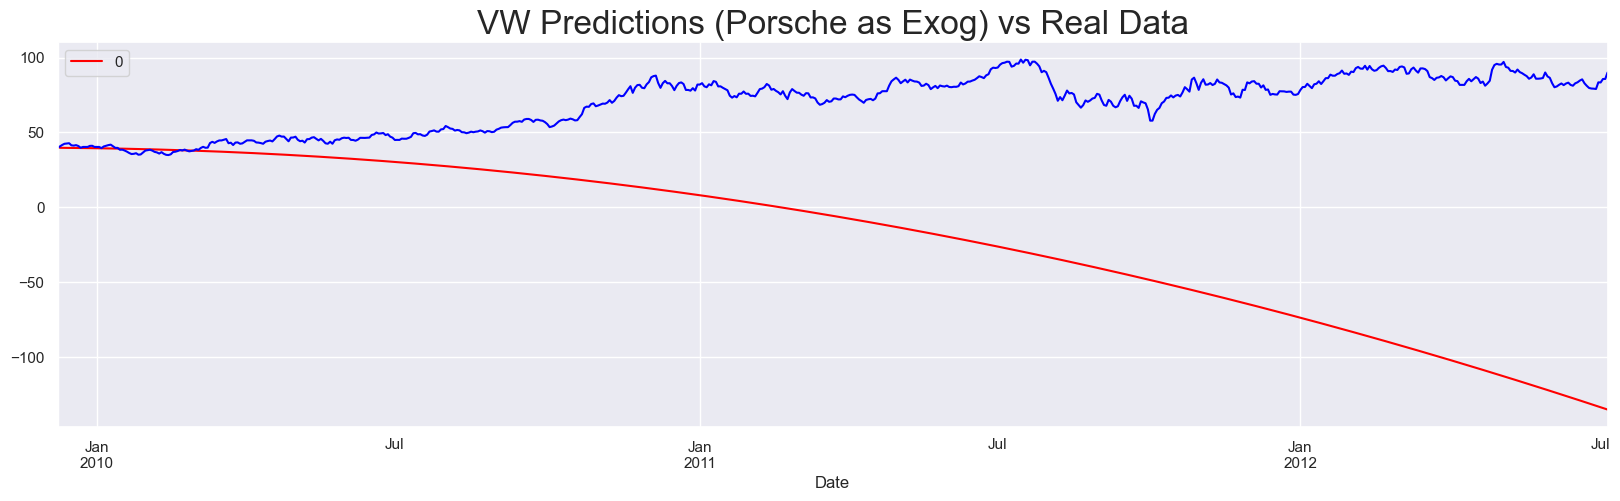

In [33]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),exogenous = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()

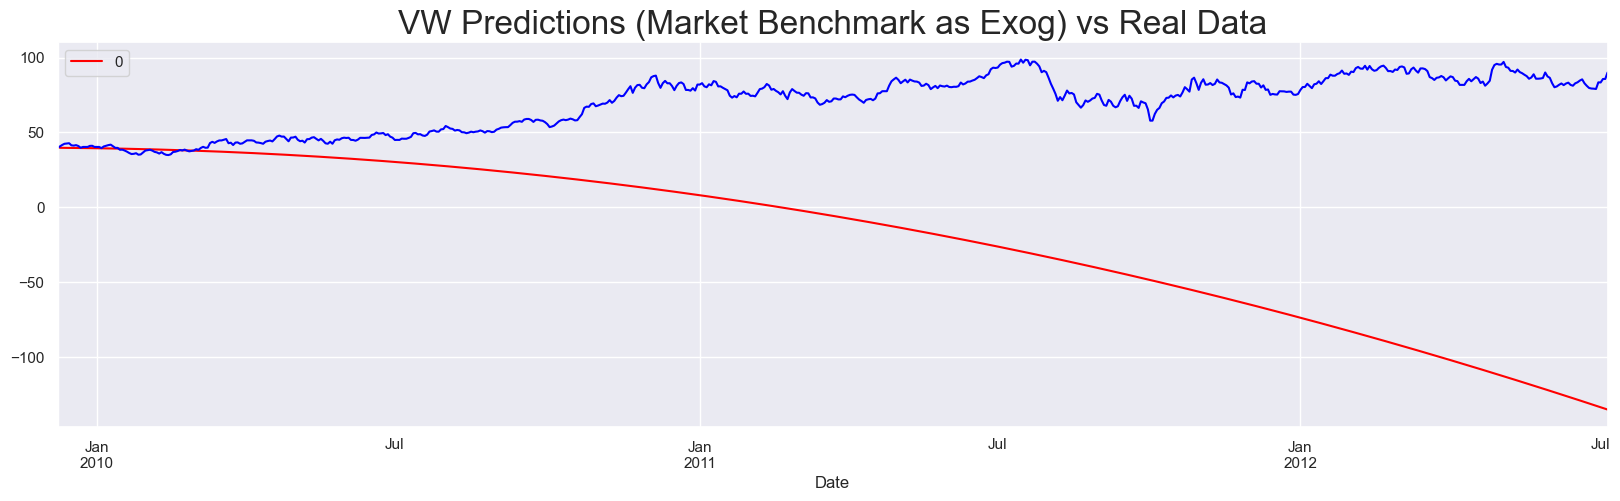

In [34]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size = 24)
plt.show()

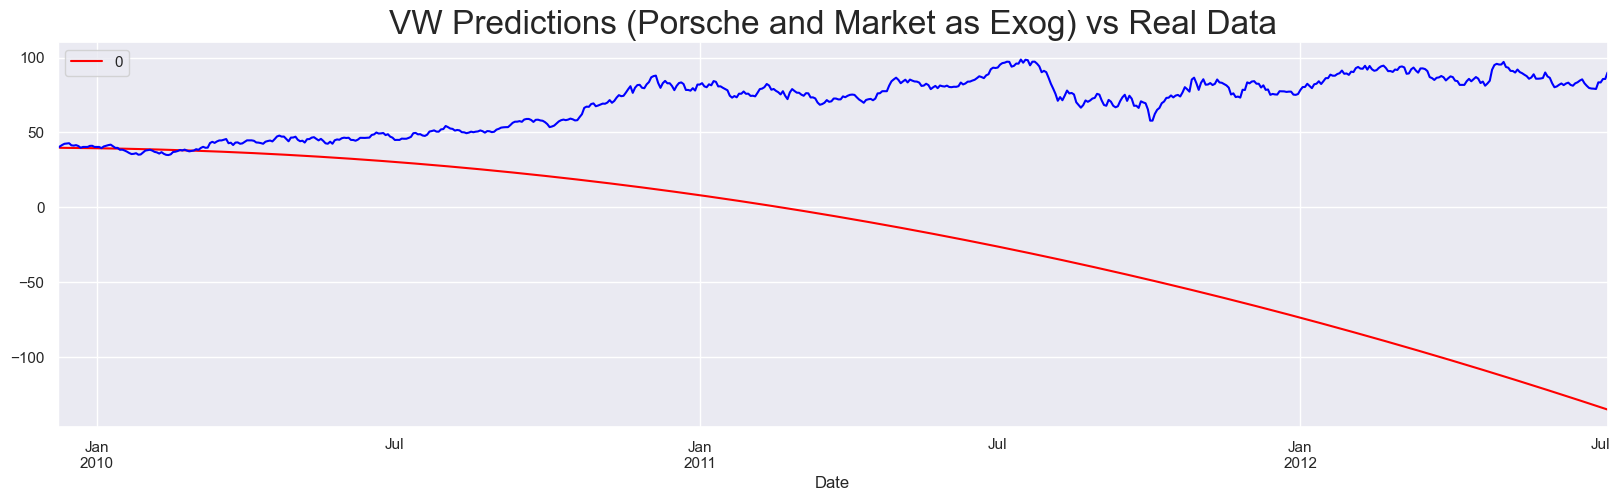

In [35]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por','bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size = 24)
plt.show()

## Volatility

### Volatility of VW for Each Period

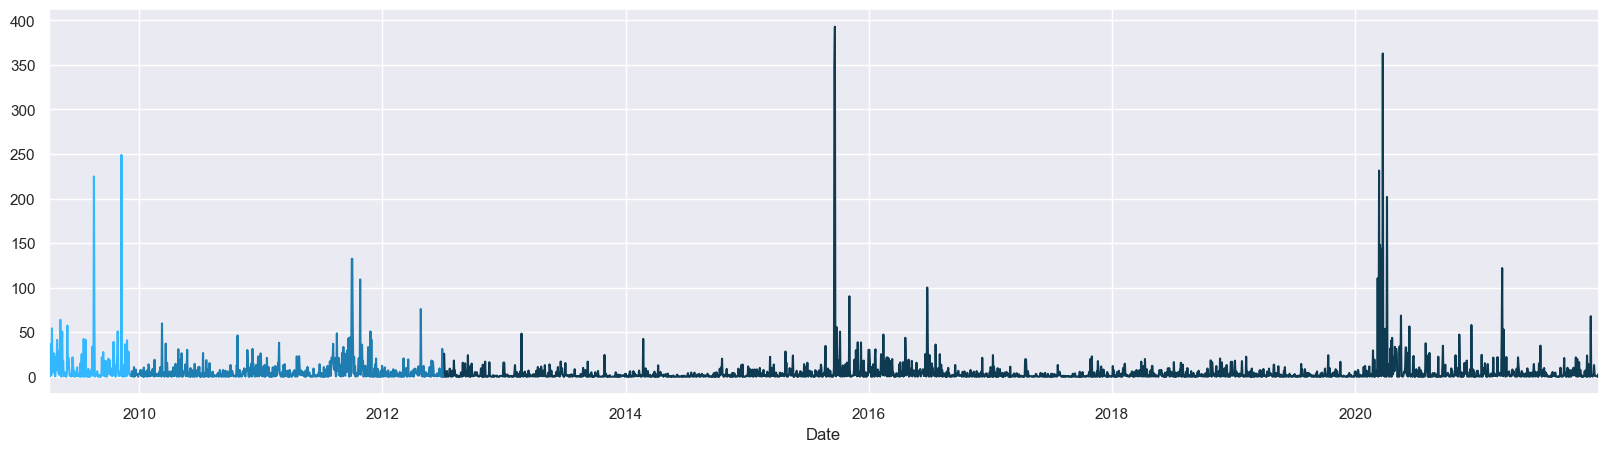

In [36]:
df['sq_vol'][start_date:ann_1].plot(figsize = (20,5), color = "#33B8FF")
df['sq_vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['sq_vol'][ann_2:end_date].plot(color = "#0E3A52")
plt.show()

### Volatility Trends for Each Period

In [37]:
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre = model_garch_pre.fit(update_freq = 5)

model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_btn = model_garch_btn.fit(update_freq = 5)

model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post = model_garch_post.fit(update_freq = 5)

Iteration:      5,   Func. Count:     31,   Neg. LLF: 475.7774600246869
Iteration:     10,   Func. Count:     56,   Neg. LLF: 475.0030794309346
Iteration:     15,   Func. Count:     80,   Neg. LLF: 474.99042598970095
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.9904259374089
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1526.7535026272703
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1526.7315718547236
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.7315718534792
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     36,   Neg. LLF: 5077.172524494798
Iteration:     10,   Func. Count:     64,   Neg. LLF: 5063.072384123554
Optimization terminated successfully    (Exit mode 0)
            Current 

In [38]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.990
Distribution:                  Normal   AIC:                           957.981
Method:            Maximum Likelihood   BIC:                           970.708
                                        No. Observations:                  178
Date:                Fri, Mar 31 2023   Df Residuals:                      177
Time:                        14:40:43   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1570      0.266      0.589      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6196      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.195e-02      1.675  9.400e-02 [-2.623e-02,  0.334]
beta[1]    1.9712e-13      0.349  5.645e-13      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [39]:
results_garch_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Fri, Mar 31 2023   Df Residuals:                      671
Time:                        14:40:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.884      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [40]:
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5063.07
Distribution:                  Normal   AIC:                           10134.1
Method:            Maximum Likelihood   BIC:                           10157.4
                                        No. Observations:                 2477
Date:                Fri, Mar 31 2023   Df Residuals:                     2476
Time:                        14:40:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0850  3.528e-02      2.409  1.599e-02 [1.585e-02,  0.154]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0733  4.183e-02      1.753  7.959e-02 [-8.652e-03,  0.155]
alpha[1]       0.0819  2.555e-02      3.205  1.352e-03  [3.181e-02,  0.132]
beta[1]        0.9036  3.181e-02     28.408 1.616e-177    [  0.841,  0.966]
===========================================================================

Covariance estimator: robust
"""